In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


Matplotlib is building the font cache; this may take a moment.


In [3]:
train = pd.read_csv(r"E:\Deep Learning\semester project\Toxic-Comment-Detector\data\train.csv")
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
import re

def clean_text(text):
    text = str(text)
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z ]", "", text)  # only alphabets
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text

train["clean_text"] = train["comment_text"].apply(clean_text)
train.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,explanationwhy the edits made under my usernam...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,daww he matches this background colour im seem...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,hey man im really not trying to edit war its j...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,morei cant make any real suggestions on improv...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,you sir are my hero any chance you remember wh...


In [5]:
X = train["clean_text"].values

y = train[["toxic", "severe_toxic", "obscene",
           "threat", "insult", "identity_hate"]].values


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
max_words = 20000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [8]:
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_words, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')  # 6 labels
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    X_train_pad, y_train,
    epochs=3,
    batch_size=128,
    validation_split=0.1
)

Epoch 1/3
898/898 ━━━━━━━━━━━━━━━━━━━━ 797s 865ms/step - accuracy: 0.9459 - loss: 0.0878 - val_accuracy: 0.9940 - val_loss: 0.0543
Epoch 2/3
898/898 ━━━━━━━━━━━━━━━━━━━━ 693s 772ms/step - accuracy: 0.9917 - loss: 0.0523 - val_accuracy: 0.9940 - val_loss: 0.0522
Epoch 3/3
898/898 ━━━━━━━━━━━━━━━━━━━━ 851s 892ms/step - accuracy: 0.9780 - loss: 0.0459 - val_accuracy: 0.9939 - val_loss: 0.0523


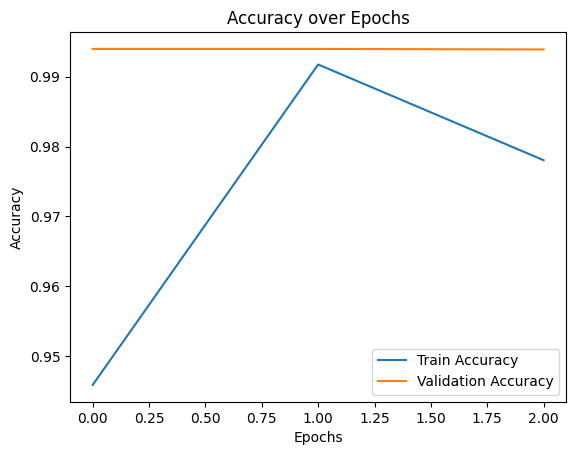

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

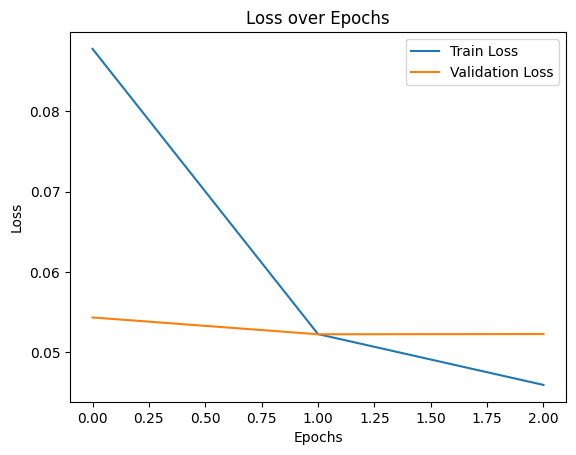

In [13]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

998/998 ━━━━━━━━━━━━━━━━━━━━ 108s 108ms/step - accuracy: 0.9940 - loss: 0.0509
Test Loss: 0.05094235762953758
Test Accuracy: 0.994046688079834


In [15]:
# Example: test a single comment
sample = ["You are so stupid!"]

# Clean the text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

sample_clean = [clean_text(s) for s in sample]

# Tokenize and pad
sample_seq = tokenizer.texts_to_sequences(sample_clean)
sample_pad = pad_sequences(sample_seq, maxlen=200)

# Predict
pred = model.predict(sample_pad)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.9685047  0.0787148  0.7482338  0.02929544 0.6687813  0.09883514]]


In [ ]:
import os
import pickle

# Create saved_model directory
os.makedirs("saved_model", exist_ok=True)

# Save model
model.save("saved_model/toxic_lstm.h5")
print("✓ Model saved to saved_model/toxic_lstm.h5")

# Save tokenizer
with open("saved_model/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
print("✓ Tokenizer saved to saved_model/tokenizer.pkl")

# Save tokenizer info
tokenizer_info = {
    "num_words": max_words,
    "max_len": max_len,
    "word_index_size": len(tokenizer.word_index)
}
with open("saved_model/tokenizer_info.pkl", "wb") as f:
    pickle.dump(tokenizer_info, f)
print("✓ Tokenizer info saved to saved_model/tokenizer_info.pkl")

print("\n" + "="*50)
print("✓ All files saved successfully!")
print("✓ Model is present in saved_model folder")
print("="*50)
print("\nReady! Now run: streamlit run app.py")
print("="*50)